# EDA Assignment

# Problem Statement
### Given data about loan applications from a consumer finance company which specialises in lending various types of loans to urban customers, using EDA to analyse the patterns present in the data and deliver solutions to minimise the risk of losing money while lending to customers.

### Business Objective
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

In [146]:
#importing required libraries

# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings('ignore')

## Application Data Analysis

### 1. **Reading data**

In [147]:
# reading applications data

applications_data = pd.read_csv('application_data.csv')
applications_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. **Understanding columns**

In [148]:
#reading column and row numbers present in the csv file

applications_data.shape

(307511, 122)

In [149]:
#reading column description csv file

applications_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

### 3. **Data checking anf handling missing values**

In [150]:
#function to show null value %age in each column of given dataframe

def null_percentage(df):
    res = df.isnull().mean().reset_index()
    res.columns = ['Column Name', 'Null Percentage']
    res['Null Percentage'] = round(res['Null Percentage'] * 100, 2)
    return res

# function to filter null value columns by given threshold %age (50%)

def null_threshold(df, val):
    return df[df['Null Percentage'] > val]

# function to delete columns given a list of column names

def drop_cols(df, cols):
    df = df.drop(cols,axis=1)
    return df

In [151]:
# checking the percentage of null values present in each columns

app_null = null_percentage(applications_data)
app_null

,Column Name,Null Percentage
0,SK_ID_CURR,0.0
1,TARGET,0.0
2,NAME_CONTRACT_TYPE,0.0
3,CODE_GENDER,0.0
4,FLAG_OWN_CAR,0.0
...,...,...
117,AMT_REQ_CREDIT_BUREAU_DAY,13.5
118,AMT_REQ_CREDIT_BUREAU_WEEK,13.5
119,AMT_REQ_CREDIT_BUREAU_MON,13.5
120,AMT_REQ_CREDIT_BUREAU_QRT,13.5


### We need to delete columns with null value %age more than 50% as data in these columns can not be evaluated to gain meaningful insights

In [152]:
#displaying columns with null % more than 50%

app_null_to_drop = null_threshold(app_null, 50)
app_null_to_drop

,Column Name,Null Percentage
21,OWN_CAR_AGE,65.99
41,EXT_SOURCE_1,56.38
44,APARTMENTS_AVG,50.75
45,BASEMENTAREA_AVG,58.52
47,YEARS_BUILD_AVG,66.50
48,COMMONAREA_AVG,69.87
49,ELEVATORS_AVG,53.30
50,ENTRANCES_AVG,50.35
52,FLOORSMIN_AVG,67.85
53,LANDAREA_AVG,59.38


In [153]:
#deleteing above columns

applications_data = drop_cols(applications_data, app_null_to_drop['Column Name'].tolist())

In [154]:
#verifying

applications_data.shape

(307511, 81)

### Dropping more columns which will not be used as it seems not useful for the analysis.

In [155]:
cols_to_drop = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',
          'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
          'REGION_RATING_CLIENT_W_CITY','FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4',
          'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
          'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
          'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
          'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE',
          'FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

applications_data = drop_cols(applications_data,cols_to_drop)

In [156]:
# dropping more unused columns

applications_data = drop_cols(applications_data, ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
'REGION_POPULATION_RELATIVE', 'LIVE_REGION_NOT_WORK_REGION','DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE'])

In [157]:
# checking for the columns and rows numbers left after dropping

applications_data.shape

(307511, 28)

In [158]:
# displaying null %age of remaining columns

app_null = null_percentage(applications_data)
app_null

,Column Name,Null Percentage
0,SK_ID_CURR,0.00
1,TARGET,0.00
2,NAME_CONTRACT_TYPE,0.00
3,CODE_GENDER,0.00
4,FLAG_OWN_CAR,0.00
5,FLAG_OWN_REALTY,0.00
6,CNT_CHILDREN,0.00
7,AMT_INCOME_TOTAL,0.00
8,AMT_CREDIT,0.00
9,AMT_ANNUITY,0.00


### 4. **Catergorising columns as numerical, categorical, and unique**

In [159]:
#function to catergorise columns as numerical, categorical, and unique 


col_names = applications_data.columns.tolist()

unique_cols = []
numerical_cols = []
categorical_cols = []

for col in col_names:
    if col == 'SK_ID_CURR': unique_cols.append(col)
    elif applications_data[col].nunique() > 100: numerical_cols.append(col)
    else: categorical_cols.append(col)

print("Unique id columns:\n",unique_cols)
print("\n")
print("Numerical columns:\n",numerical_cols)
print("\n")
print("Categorical columns:\n",categorical_cols)


Unique id columns:
 ['SK_ID_CURR']


Numerical columns:
 ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']


Categorical columns:
 ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE']


### 5. **Handling missing values, error values, outliers and Univariate Analysis**

Some helper functions

In [160]:
#Some helper functions

def box_plot(df, col):
    sns.boxplot(df[col])
    plt.show()

def dist_plot(df, col):
    sns.distplot(df[col])
    plt.show()
    
def fill_na(df,col,val):
    df[col] = df[col].fillna(val)
    return df[col].isna().sum()

In [161]:
#displaying only those columns which have null values

app_null = app_null[app_null['Null Percentage'] > 0]
app_null.sort_values(by=['Null Percentage'], ascending=False)

,Column Name,Null Percentage
19,OCCUPATION_TYPE,31.35
11,NAME_TYPE_SUITE,0.42
10,AMT_GOODS_PRICE,0.09


We know that from above columns, only AMT_GOODS_PRICE is numerical and OCCUPATION_TYPE, NAME_TYPE_SUITE are categoricals

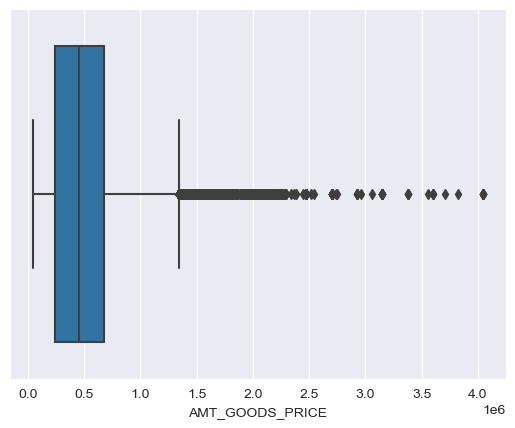

In [162]:
box_plot(applications_data, 'AMT_GOODS_PRICE')

In [163]:
applications_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [164]:
#We can Fill NA with Median for this field as it's right skewed graph

fill_na(applications_data,'AMT_GOODS_PRICE',applications_data['AMT_GOODS_PRICE'].median())

0

In [165]:
applications_data['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [166]:
# Filling with Mode ('Laborers')

fill_na(applications_data, 'OCCUPATION_TYPE', 'Laborers')

0

In [167]:
applications_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [168]:
# Filling with Mode ('Unaccompanied')

fill_na(applications_data, 'NAME_TYPE_SUITE', 'Unaccompanied')

0

### Checking for error data

In [169]:
for col in numerical_cols:
    print(applications_data[col].describe(),'\n')

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64 

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64 

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64 

count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64 

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.00000

Insights:
- DAYS_BIRTH has -ve values, need to be changed to +ve and changed to no of years
- DAYS_EMPLOYED has -ve values, need to be changed to +ve and changed to no of years, also it has an invalid value '365342' which needs to be changed to null
- DAYS_REGISTRATION has -ve values, need to be changed to +ve and changed to no of years

In [170]:
#correcting values of DAYS_BIRTH and converting to years

applications_data['DAYS_BIRTH'] = applications_data['DAYS_BIRTH'].apply(lambda days: abs(days)/365.0)

In [171]:
#renaming "DAYS_BIRTH" to "AGE"

applications_data.rename(columns={"DAYS_BIRTH":"AGE"}, inplace=True)
applications_data['AGE']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: AGE, Length: 307511, dtype: float64

In [172]:
applications_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [173]:
applications_data['DAYS_EMPLOYED'] = applications_data['DAYS_EMPLOYED'].replace([365243],[np.NaN])
applications_data['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [174]:
# new null %age
applications_data['DAYS_EMPLOYED'].isna().sum() / applications_data.shape[0] * 100

18.00716071945394

Since after removing error values, null %age is still low, we will consider this column for evaluation

In [175]:
#correcting values of DAYS_EMPLOYED and converting to years

applications_data['DAYS_EMPLOYED'] = applications_data['DAYS_EMPLOYED'].apply(lambda days: abs(days)/365.0)
applications_data.rename(columns={"DAYS_EMPLOYED":"YEARS_EMPLOYED"}, inplace=True)
applications_data['YEARS_EMPLOYED']

0          1.745205
1          3.254795
2          0.616438
3          8.326027
4          8.323288
            ...    
307506     0.646575
307507          NaN
307508    21.701370
307509    13.112329
307510     3.457534
Name: YEARS_EMPLOYED, Length: 307511, dtype: float64

In [176]:
applications_data['YEARS_EMPLOYED'].describe()

count    252137.000000
mean          6.531971
std           6.406466
min           0.000000
25%           2.101370
50%           4.515068
75%           8.698630
max          49.073973
Name: YEARS_EMPLOYED, dtype: float64

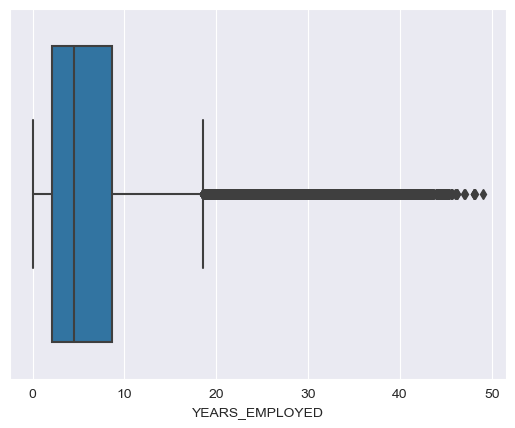

In [177]:

box_plot(applications_data, 'YEARS_EMPLOYED')

In [178]:
fill_na(applications_data, 'YEARS_EMPLOYED', applications_data['YEARS_EMPLOYED'].median())

0

In [179]:
#correcting values of DAYS_REGISTRATION and converting to years

applications_data['DAYS_REGISTRATION'] = applications_data['DAYS_REGISTRATION'].apply(lambda days: abs(days)/365.0)
applications_data.rename(columns={"DAYS_REGISTRATION":"YEARS_REGISTRATION"}, inplace=True)
applications_data['YEARS_REGISTRATION']

0          9.994521
1          3.249315
2         11.671233
3         26.939726
4         11.810959
            ...    
307506    23.167123
307507    12.021918
307508    18.457534
307509     7.019178
307510    14.049315
Name: YEARS_REGISTRATION, Length: 307511, dtype: float64

In [180]:
# checking values in categorical columns

for col in categorical_cols:
    print(applications_data[col].value_counts(),'\n')

0    282686
1     24825
Name: TARGET, dtype: int64 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64 

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman          

Insights:

CODE_GENDER and ORGANIZATION_TYPE columns need to corrected as they have XNA filled, which need to be replaced to appropriate values and these columns need to be re-evaluated

In [181]:
# replacing XNA to F in CODE_GENDER as it is more frequent

applications_data['CODE_GENDER'] = applications_data['CODE_GENDER'].replace(['XNA'],['F'])
applications_data['CODE_GENDER'].value_counts()


F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [182]:
# replacing XNA to F in CODE_GENDER as it is more frequent

applications_data['ORGANIZATION_TYPE'] = applications_data['ORGANIZATION_TYPE'].replace(['XNA'],[np.NaN])
applications_data['ORGANIZATION_TYPE'].isna().sum() / applications_data['ORGANIZATION_TYPE'].shape[0] * 100

18.00716071945394

In [183]:
fill_na(applications_data, 'ORGANIZATION_TYPE', 'Business Entity Type 3' )
applications_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    123366
Self-employed              38412
Other                      16683
Medicine                   11193
Business Entity Type 2     10553
Government                 10404
School                      8893
Trade: type 7               7831
Kindergarten                6880
Construction                6721
Business Entity Type 1      5984
Transport: type 4           5398
Trade: type 3               3492
Industry: type 9            3368
Industry: type 3            3278
Security                    3247
Housing                     2958
Industry: type 11           2704
Military                    2634
Bank                        2507
Agriculture                 2454
Police                      2341
Transport: type 2           2204
Postal                      2157
Security Ministries         1974
Trade: type 2               1900
Restaurant                  1811
Services                    1575
University                  1327
Industry: type 7            1307
Transport:

In [184]:
applications_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_REGISTRATION,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,9.994521,Laborers,WEDNESDAY,10,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,3.249315,Core staff,MONDAY,11,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,11.671233,Laborers,MONDAY,9,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,26.939726,Laborers,WEDNESDAY,17,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11.810959,Core staff,THURSDAY,11,0,0,0,1,1,Religion


In [185]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

applications_data['AMT_INCOME_RANGE'] = pd.cut(applications_data['AMT_INCOME_TOTAL'], bins = bins, labels=slots)

In [186]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

applications_data['AMT_CREDIT'] = pd.cut(applications_data['AMT_CREDIT'], bins = bins, labels=slots)

In [187]:
bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

applications_data['AMT_GOODS_PRICE'] = pd.cut(applications_data['AMT_GOODS_PRICE'], bins = bins, labels=slots)

## 6. **Data Imbalance**

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e here taget variable is "TARGET" where "1" has a very high number of observations and "0" has a very low number of observations. We can better understand imbalanced dataset below:


In [188]:
defaulters = applications_data.loc[applications_data.TARGET == 1]
non_defaulters = applications_data.loc[applications_data.TARGET == 0]

imbalance_ratio = len(non_defaulters)/len(defaulters)

print("Imbalance ratio (non defaulters: defaulters):", imbalance_ratio)

Imbalance ratio (non defaulters: defaulters): 11.387150050352467


## 7. **Biivariate Analysis**

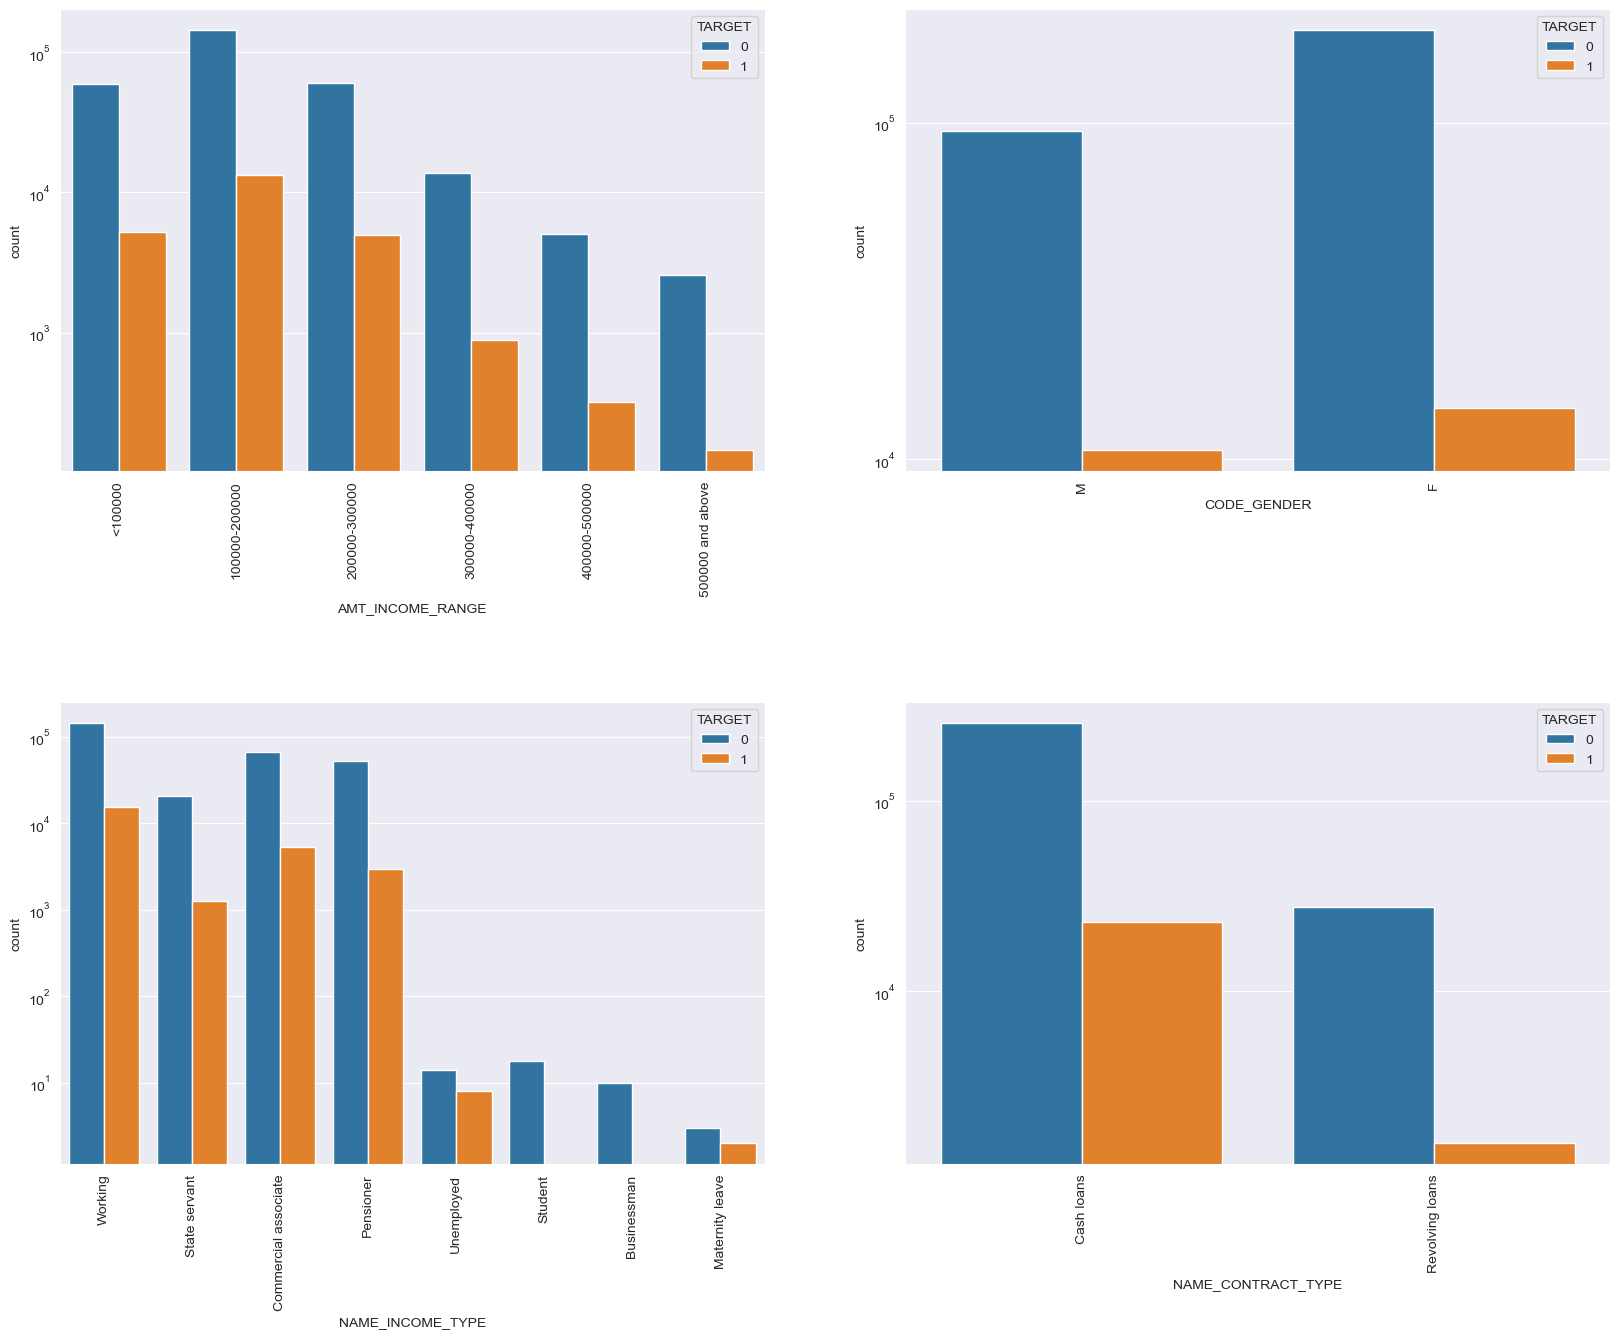

In [189]:

plt.figure(figsize = (20, 15))

for i, col in enumerate(['AMT_INCOME_RANGE','CODE_GENDER', 'NAME_INCOME_TYPE','NAME_CONTRACT_TYPE']):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x = col, hue = 'TARGET', data = applications_data)
    
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

Observations:

- People having icome range 100000-200000 have high number of loans and also have more defaulters than others, while income segment > 500000 has less defaulters.

- 'Females' apply more for loans and tend to be become defaulters slightly more often than males.

- Student and business are higher in percentage of loan repayment.

- People apply more for 'Cash Loan' than 'Revolving Loan', also defaulters ae higher in 'Cash Loan'

 

### 8. **Correlation**

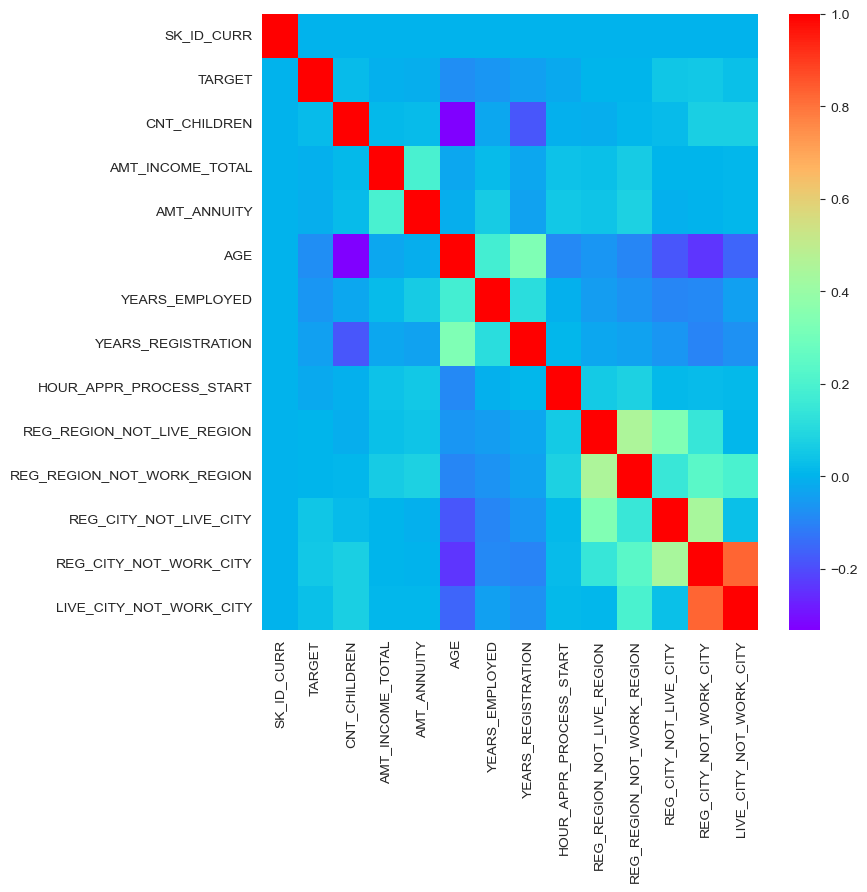

In [283]:
corrmat = applications_data.corr() 
  
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

### Top 5 Correlation Fields for Others


In [190]:
# Top 10 corelated variables: Target0 dataaframe

corr = non_defaulters.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head()

,Var1,Var2,Correlation
194,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.83
149,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.45
179,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.44
59,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
72,AGE,CNT_CHILDREN,0.34


### Top 5 Correlation Fields for Defaulters


In [282]:
# Top 10 correlated variables: Target1 dataaframe

corr = defaulters.corr()
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head()

,Var1,Var2,Correlation
194,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.78
149,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.50
179,REG_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,0.47
163,REG_CITY_NOT_LIVE_CITY,REG_REGION_NOT_LIVE_REGION,0.32
103,YEARS_REGISTRATION,AGE,0.29


Observation:

- From the above corelation analysis we can say that the highest corelation (0.99) is between (AMT_GOODS_PRICE	with AMT_CREDIT)


# Previous Applications data

## 1. **Reading Data**

In [192]:
# reading applications data

previous_data = pd.read_csv('previous_application.csv')
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### 2. **Understanding columns**

In [193]:
#reading column and row numbers present in the csv file

previous_data.shape

(1670214, 37)

In [194]:
#reading column description csv file

previous_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### 3. **Data checking anf handling missing values**

In [195]:
pre_null = null_percentage(previous_data)
pre_null

,Column Name,Null Percentage
0,SK_ID_PREV,0.00
1,SK_ID_CURR,0.00
2,NAME_CONTRACT_TYPE,0.00
3,AMT_ANNUITY,22.29
4,AMT_APPLICATION,0.00
5,AMT_CREDIT,0.00
6,AMT_DOWN_PAYMENT,53.64
7,AMT_GOODS_PRICE,23.08
8,WEEKDAY_APPR_PROCESS_START,0.00
9,HOUR_APPR_PROCESS_START,0.00


We need to delete columns with null value %age more than 50% as data in these columns can not be evaluated to gain meaningful insights

In [196]:
#displaying columns with null % more than 50%

pre_null_to_drop = null_threshold(pre_null, 50)
pre_null_to_drop

,Column Name,Null Percentage
6,AMT_DOWN_PAYMENT,53.64
12,RATE_DOWN_PAYMENT,53.64
13,RATE_INTEREST_PRIMARY,99.64
14,RATE_INTEREST_PRIVILEGED,99.64


In [197]:
#deleteing above columns

previous_data = drop_cols(previous_data, pre_null_to_drop['Column Name'].tolist())

In [198]:
previous_data.shape

(1670214, 33)

In [199]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### Dropping more columns which will not be used as it seems not useful for the analysis.

In [200]:
prev_cols_to_drop = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','PRODUCT_COMBINATION','DAYS_TERMINATION']
previous_data = drop_cols(previous_data,prev_cols_to_drop)

In [201]:
previous_data.shape

(1670214, 27)

In [202]:
# displaying null %age of remaining columns

prev_app_null = null_percentage(previous_data)
prev_app_null

,Column Name,Null Percentage
0,SK_ID_PREV,0.00
1,SK_ID_CURR,0.00
2,NAME_CONTRACT_TYPE,0.00
3,AMT_ANNUITY,22.29
4,AMT_APPLICATION,0.00
5,AMT_CREDIT,0.00
6,AMT_GOODS_PRICE,23.08
7,NAME_CASH_LOAN_PURPOSE,0.00
8,NAME_CONTRACT_STATUS,0.00
9,DAYS_DECISION,0.00


In [203]:
# displaying columns with null values present in the columns

prev_app_null[prev_app_null['Null Percentage']>0]


,Column Name,Null Percentage
3,AMT_ANNUITY,22.29
6,AMT_GOODS_PRICE,23.08
12,NAME_TYPE_SUITE,49.12
20,CNT_PAYMENT,22.29
22,DAYS_FIRST_DRAWING,40.30
23,DAYS_FIRST_DUE,40.30
24,DAYS_LAST_DUE_1ST_VERSION,40.30
25,DAYS_LAST_DUE,40.30
26,NFLAG_INSURED_ON_APPROVAL,40.30


### 4. **Catergorising columns as numerical, categorical, and unique**

In [204]:
#function to catergorise columns as numerical, categorical, and unique 


col_names = previous_data.columns.tolist()

prev_unique_cols = []
prev_numerical_cols = []
prev_categorical_cols = []

for col in col_names:
    if col == 'SK_ID_CURR' or col == 'SK_ID_PREV' : prev_unique_cols.append(col)
    elif previous_data[col].nunique() > 100: prev_numerical_cols.append(col)
    else: prev_categorical_cols.append(col)

print(" Previous Unique id columns:\n",prev_unique_cols)
print("\n")
print(" Previous Numerical columns:\n",prev_numerical_cols)
print("\n")
print(" Previous Categorical columns:\n",prev_categorical_cols)


 Previous Unique id columns:
 ['SK_ID_PREV', 'SK_ID_CURR']


 Previous Numerical columns:
 ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE']


 Previous Categorical columns:
 ['NAME_CONTRACT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL']


### 5. **Handling missing values, error values, outliers and Univariate Analysis**

In [205]:
#displaying only those columns which have null values
prev_app_null = prev_app_null[prev_app_null['Null Percentage'] > 0]
prev_app_null.sort_values(by=['Null Percentage'], ascending=False)

,Column Name,Null Percentage
12,NAME_TYPE_SUITE,49.12
22,DAYS_FIRST_DRAWING,40.30
23,DAYS_FIRST_DUE,40.30
24,DAYS_LAST_DUE_1ST_VERSION,40.30
25,DAYS_LAST_DUE,40.30
26,NFLAG_INSURED_ON_APPROVAL,40.30
6,AMT_GOODS_PRICE,23.08
3,AMT_ANNUITY,22.29
20,CNT_PAYMENT,22.29


We know that from above columns, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, AMT_GOODS_PRICE, AMT_ANNUITY are numerical and NAME_TYPE_SUITE, NFLAG_INSURED_ON_APPROVAL, CNT_PAYMENT are categoricals

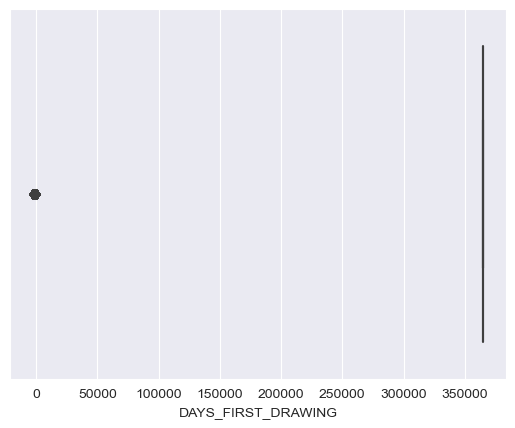

In [206]:
box_plot(previous_data, 'DAYS_FIRST_DRAWING')

In [207]:
previous_data['DAYS_FIRST_DRAWING'].describe()


count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [208]:
# filling error value with na as there is an extreme value i.e 365243 which is not valid

previous_data['DAYS_FIRST_DRAWING'] = previous_data['DAYS_FIRST_DRAWING'].apply(lambda x: np.NaN if x == 365243 else x)


In [209]:
# finding new null value percentage after removing error data

previous_data['DAYS_FIRST_DRAWING'].isna().sum() / previous_data['DAYS_FIRST_DRAWING'].shape[0] * 100

96.24569067197378

In [210]:
# removing this column as null percentage is > 50%

previous_data=previous_data.drop(['DAYS_FIRST_DRAWING'],axis=1)

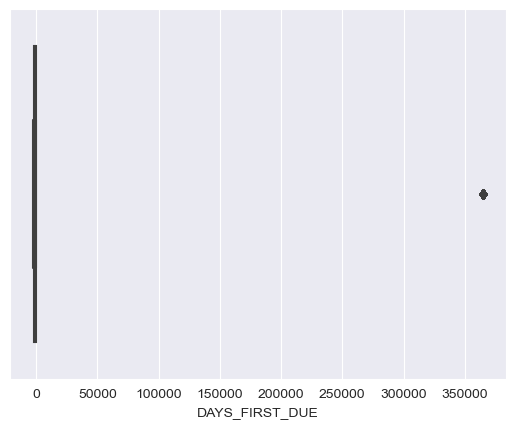

In [211]:
box_plot(previous_data, 'DAYS_FIRST_DUE')

In [212]:
previous_data['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [213]:
# filling error value with na as there is an extreme value  i.e 365243 which is not valid

previous_data['DAYS_FIRST_DUE'] = previous_data['DAYS_FIRST_DUE'].apply(lambda x: np.NaN if x == 365243 else x)

In [214]:
#finding new null value %

previous_data['DAYS_FIRST_DUE'].isna().sum() / previous_data['DAYS_FIRST_DUE'].shape[0] * 100

42.731649956233156

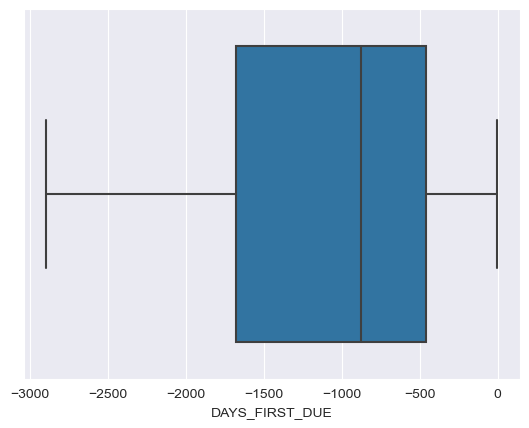

In [215]:
box_plot(previous_data, 'DAYS_FIRST_DUE')


In [216]:
previous_data['DAYS_FIRST_DUE'].describe()

count    956504.000000
mean      -1106.583027
std         790.703113
min       -2892.000000
25%       -1676.000000
50%        -874.000000
75%        -459.000000
max          -2.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [217]:
#We can Fill NA with Median for this field

previous_data['DAYS_FIRST_DUE'] = previous_data['DAYS_FIRST_DUE'].fillna(previous_data['DAYS_FIRST_DUE'].median())
previous_data['DAYS_FIRST_DUE'].isna().sum()


0

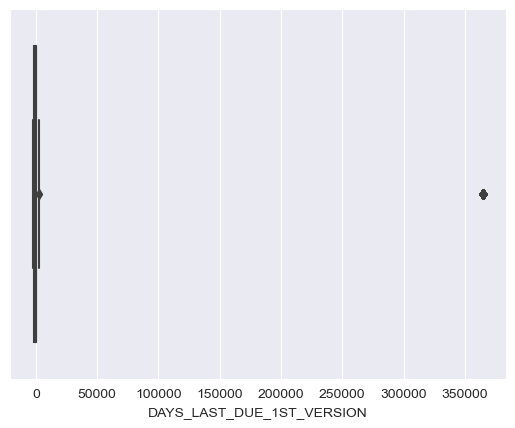

In [218]:
box_plot(previous_data, 'DAYS_LAST_DUE_1ST_VERSION')

In [219]:
previous_data['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [220]:
# filling error value with na as there is an extreme value  i.e 365243 which is not valid

previous_data['DAYS_LAST_DUE_1ST_VERSION'] = previous_data['DAYS_LAST_DUE_1ST_VERSION'].apply(lambda x: np.NaN if x == 365243 else x)

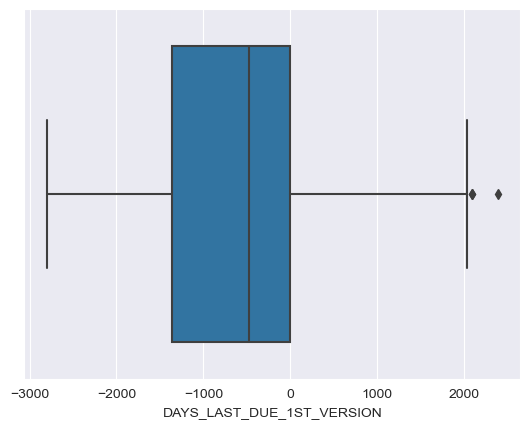

In [221]:
box_plot(previous_data, 'DAYS_LAST_DUE_1ST_VERSION')

In [222]:
#finding new null value %

previous_data['DAYS_LAST_DUE_1ST_VERSION'].isna().sum() / previous_data['DAYS_LAST_DUE_1ST_VERSION'].shape[0] * 100

45.91800811153541

In [223]:
previous_data['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    903285.000000
mean       -677.158175
std         923.601152
min       -2801.000000
25%       -1359.000000
50%        -480.000000
75%          -2.000000
max        2389.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [224]:
# keeping this field as this will be required for analysis and proceeding with filling null values with median
#We can Fill NA with Median for this field

previous_data['DAYS_LAST_DUE_1ST_VERSION'] = previous_data['DAYS_LAST_DUE_1ST_VERSION'].fillna(previous_data['DAYS_LAST_DUE_1ST_VERSION'].median())
previous_data['DAYS_LAST_DUE_1ST_VERSION'].isna().sum()

0

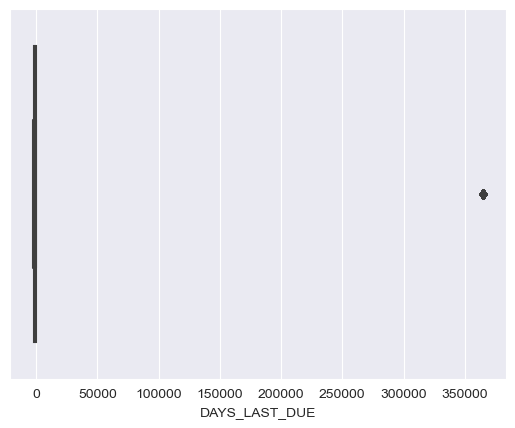

In [225]:
box_plot(previous_data, 'DAYS_LAST_DUE')

In [226]:
previous_data['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

In [227]:
# filling error value with na as there is an extreme value which  i.e 365243 is not valid

previous_data['DAYS_LAST_DUE'] = previous_data['DAYS_LAST_DUE'].apply(lambda x: np.NaN if x == 365243 else x)

#finding new null %

previous_data['DAYS_LAST_DUE'].isna().sum() / previous_data['DAYS_LAST_DUE'].shape[0] * 100

52.94447298370149

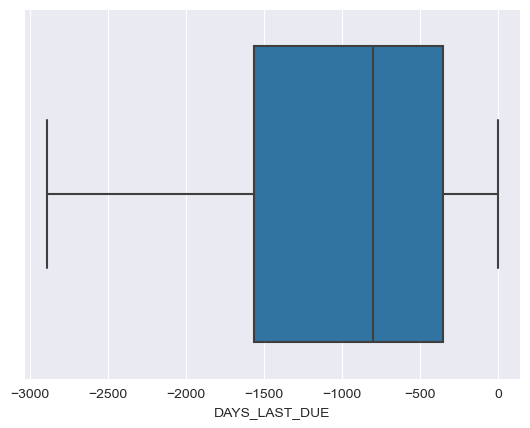

In [228]:
box_plot(previous_data, 'DAYS_LAST_DUE')

In [229]:
previous_data['DAYS_LAST_DUE'].describe()

count    785928.000000
mean       -996.179128
std         752.703178
min       -2889.000000
25%       -1566.000000
50%        -801.000000
75%        -353.000000
max          -2.000000
Name: DAYS_LAST_DUE, dtype: float64

In [230]:
# keeping this field as this will be required for analysis and proceeding with filling null values with median
#We can Fill NA with Median for this field

previous_data['DAYS_LAST_DUE'] = previous_data['DAYS_LAST_DUE'].fillna(previous_data['DAYS_LAST_DUE'].median())
previous_data['DAYS_LAST_DUE'].isna().sum()


0

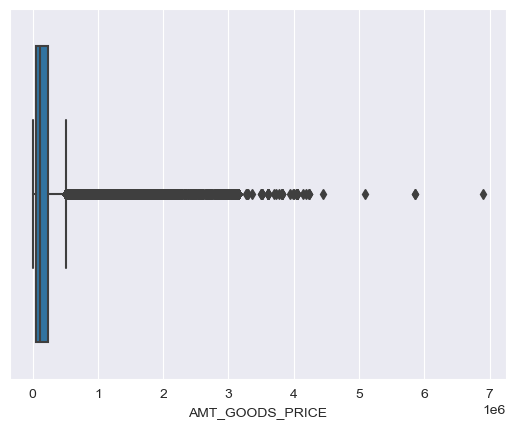

In [231]:
box_plot(previous_data, 'AMT_GOODS_PRICE')

In [232]:
previous_data['AMT_GOODS_PRICE'].describe()


count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [233]:
#We can Fill NA with 112320 i.e. Median for this field

previous_data['AMT_GOODS_PRICE'] = previous_data['AMT_GOODS_PRICE'].fillna(previous_data['AMT_GOODS_PRICE'].median())
previous_data['AMT_GOODS_PRICE'].isna().sum()

0

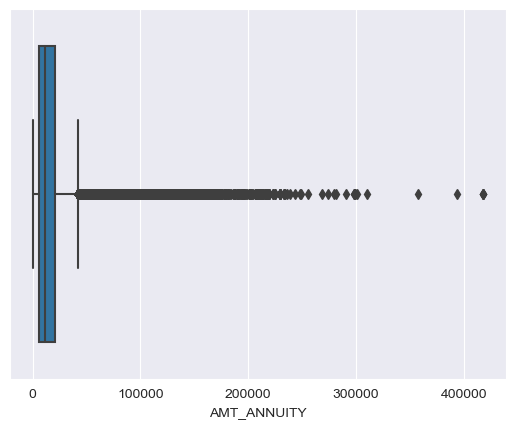

In [234]:
box_plot(previous_data, 'AMT_ANNUITY')

In [235]:
previous_data['AMT_ANNUITY'].describe()


count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [236]:
previous_data['AMT_ANNUITY'] = previous_data['AMT_ANNUITY'].fillna(previous_data['AMT_ANNUITY'].mean())
previous_data['AMT_ANNUITY'].isna().sum()

0

In [237]:
previous_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [238]:
fill_na(previous_data, 'NAME_TYPE_SUITE', 'Unaccompanied')

0

In [239]:
previous_data['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [240]:
fill_na(previous_data, 'NFLAG_INSURED_ON_APPROVAL', 0 )

0

In [241]:
previous_data['CNT_PAYMENT'].value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [242]:
fill_na(previous_data, 'CNT_PAYMENT', '12.0')

0

### Checking for error data/ Converting -ve values into +ve ones nad converting days into years

In [246]:
# need to see column wise numerical and categorial column description

for col in prev_numerical_cols:
    if col != 'DAYS_FIRST_DRAWING' : print(previous_data[col].describe(),'\n')

count    1.670214e+06
mean     1.595512e+04
std      1.303122e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.544967e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64 

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64 

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64 

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64 

count    1.670214e+06
mean    -8.806797e+02
std      7.790997e+02
min     -2.922000e+03
25%     -1.300000e+03
50%     -5.810000e+02
75%     -2.80

Insights:
- DAYS_FIRST_DUE has -ve values, need to be changed to +ve and changed to no of years
- DAYS_LAST_DUE_1ST_VERSION -ve values, need to be changed to +ve and changed to no of years
- DAYS_LAST_DUE has -ve values, need to be changed to +ve and changed to no of years
- DAYS_DECISION, has -ve values, need to be changed to +ve and changed to no of years
- SELLERPLACE_AREA, has -ve values, need to be changed to +ve and changed to no of years (it is left)**

In [247]:
#correcting values of DAYS_FIRST_DUE and converting to years

previous_data['DAYS_FIRST_DUE'] = previous_data['DAYS_FIRST_DUE'].apply(lambda days: abs(days)/365.0)

In [284]:
previous_data['DAYS_FIRST_DUE'].describe()

count    1.670214e+06
mean     2.759442e+00
std      1.669404e+00
min      5.479452e-03
25%      2.060274e+00
50%      2.394521e+00
75%      2.794521e+00
max      7.923288e+00
Name: DAYS_FIRST_DUE, dtype: float64

In [249]:
#correcting values of DAYS_LAST_DUE_1ST_VERSION and converting to years

previous_data['DAYS_LAST_DUE_1ST_VERSION'] = previous_data['DAYS_LAST_DUE_1ST_VERSION'].apply(lambda days: abs(days)/365.0)

In [250]:
previous_data['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    1.670214e+06
mean     1.883229e+00
std      1.603700e+00
min      0.000000e+00
25%      1.315068e+00
50%      1.315068e+00
75%      1.934247e+00
max      7.673973e+00
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [251]:
#correcting values of DAYS_LAST_DUE and converting to years

previous_data['DAYS_LAST_DUE'] = previous_data['DAYS_LAST_DUE'].apply(lambda days: abs(days)/365.0)

In [252]:
previous_data['DAYS_LAST_DUE'].describe()

count    1.670214e+06
mean     2.446144e+00
std      1.439567e+00
min      5.479452e-03
25%      2.194521e+00
50%      2.194521e+00
75%      2.194521e+00
max      7.915068e+00
Name: DAYS_LAST_DUE, dtype: float64

In [253]:
#correcting values of DAYS_DECISION and converting to years

previous_data['DAYS_DECISION'] = previous_data['DAYS_DECISION'].apply(lambda days: abs(days)/365.0)

In [254]:
previous_data['DAYS_DECISION'].describe()

count    1.670214e+06
mean     2.412821e+00
std      2.134520e+00
min      2.739726e-03
25%      7.671233e-01
50%      1.591781e+00
75%      3.561644e+00
max      8.005479e+00
Name: DAYS_DECISION, dtype: float64

In [256]:
# need to see column wise categorial column description
for col in prev_categorical_cols:
    print(previous_data[col].value_counts(),'\n')

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64 

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                  

Insights:

'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGOR', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP','NAME_CONTRACT_TYP' and 'NAME_CONTRACT_TYP' columns need to corrected as they have XNA and XAP filled, which need to be replaced to appropriate values and these columns need to be re-evaluated.






In [257]:
#replacing 'XNA' and 'XAP' with 'N/A' in these columns 'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGOR', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP' as they were very high in numbers and can't imputed. 
previous_data = previous_data.replace(['XNA','XAP'],['N/A','N/A'])

In [258]:
# Filling 'N/A' in columns 'Cash loans' where no. are low 'NAME_CONTRACT_TYP'

previous_data['NAME_CONTRACT_TYPE'] = previous_data['NAME_CONTRACT_TYPE'].replace(['N/A'],['Cash loans'])
previous_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193164
Name: NAME_CONTRACT_TYPE, dtype: int64

In [259]:
# Filling 'N/A' in columns 'Repeater' where no. are low 'NAME_CONTRACT_TYP'


previous_data['NAME_CLIENT_TYPE'] = previous_data['NAME_CLIENT_TYPE'].replace(['N/A'],['Repeater'])
previous_data['NAME_CLIENT_TYPE'].value_counts()


Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [260]:
previous_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,...,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,N/A,Approved,0.200000,...,N/A,Country-wide,35,Connectivity,12.0,middle,0.115068,0.821918,0.115068,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,N/A,Approved,0.449315,...,x-sell,Contact center,-1,N/A,36.0,low_action,0.367123,2.509589,2.194521,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,N/A,Approved,0.824658,...,x-sell,Credit and cash offices,-1,N/A,12.0,high,0.742466,0.161644,2.194521,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,N/A,Approved,1.402740,...,x-sell,Credit and cash offices,-1,N/A,12.0,middle,1.320548,0.416438,0.498630,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,Repairs,Refused,2.139726,...,walk-in,Credit and cash offices,-1,N/A,24.0,high,2.394521,1.315068,2.194521,0.0


 Creating bins for continous variable categories column 'AMT_ANNUITY', 'AMT_APPLICATION' and 'AMT_CREDIT','AMT_GOODS_PRICE'


In [261]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

previous_data['AMT_ANNUITY_RANGE'] = pd.cut(previous_data['AMT_ANNUITY'], bins = bins, labels=slots)
previous_data['AMT_ANNUITY_RANGE'].value_counts()

<100000             1665850
100000-200000          2616
200000-300000           103
300000-400000             4
400000-500000             4
500000 and above          0
Name: AMT_ANNUITY_RANGE, dtype: int64

In [262]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

previous_data['AMT_APPLICATION_RANGE'] = pd.cut(previous_data['AMT_APPLICATION'], bins = bins, labels=slots)
previous_data['AMT_APPLICATION_RANGE'].value_counts()

<100000             595665
100000-200000       281998
500000 and above    146286
200000-300000       132605
400000-500000        70067
300000-400000        51191
Name: AMT_APPLICATION_RANGE, dtype: int64

In [263]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

previous_data['AMT_CREDIT_RANGE'] = pd.cut(previous_data['AMT_CREDIT'], bins = bins, labels=slots)
previous_data['AMT_CREDIT_RANGE'].value_counts()

<100000             600007
100000-200000       295054
500000 and above    181720
200000-300000       137655
400000-500000        61640
300000-400000        57369
Name: AMT_CREDIT_RANGE, dtype: int64

In [264]:
# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

previous_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(previous_data['AMT_GOODS_PRICE'], bins = bins, labels=slots)
previous_data['AMT_GOODS_PRICE_RANGE'].value_counts()

100000-200000       667492
<100000             595661
500000 and above    146339
200000-300000       132586
400000-500000        70081
300000-400000        51186
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

In [265]:
# Creating bins for continous variable categories column 'AGE'

bins = [0,20,40,60,100]
slots = ['<20 Yrs','20-40 Yrs','40-60 Yrs', '60 Yrs and above']

applications_data['AGE_RANGE'] = pd.cut(applications_data['AGE'], bins = bins, labels=slots)
applications_data['AGE_RANGE'].value_counts()

40-60 Yrs           144603
20-40 Yrs           127329
60 Yrs and above     35579
<20 Yrs                  0
Name: AGE_RANGE, dtype: int64

### 6. **Merging the two datasets on SK_ID_CURR**

In [266]:
# Merging both the dataframes (application_data, previous_application)

merged_data = pd.merge(left = applications_data, right = previous_data, how='inner', on ='SK_ID_CURR', suffixes ='_x')
merged_data.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,CNT_PAYMENT,NAME_YIELD_GROUP,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_ANNUITY_RANGE,AMT_APPLICATION_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,400000-500000,24700.5,...,24.0,low_normal,1.547945,0.342466,0.068493,0.0,<100000,100000-200000,100000-200000,100000-200000
1,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,12.0,low_normal,1.961644,1.057534,1.468493,1.0,<100000,500000 and above,500000 and above,500000 and above
2,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,6.0,middle,2.183562,1.772603,1.772603,0.0,<100000,300000-400000,300000-400000,300000-400000
3,100003,0,Cash loans,F,N,N,0,270000.0,500000 and above,35698.5,...,12.0,middle,6.328767,5.424658,5.424658,1.0,<100000,<100000,<100000,<100000
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,100000-200000,6750.0,...,4.0,middle,2.147945,1.901370,1.983562,0.0,<100000,<100000,<100000,<100000


In [ ]:
merged_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'AGE', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AGE_RANGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPEx', 'AMT_ANNUITYx', 'AMT_APPLICATION', 'AMT_CREDITx',
       'AMT_GOODS_PRICEx', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITEx', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_POR

In [267]:
merged_data.shape

(1413701, 59)

In [269]:
# replacing all N/A values in merged data with NaN for better visualization with graphs

merged_data = merged_data.replace(['N/A'],[np.NaN])

### 7. **Bivariate Analysis**

### Distribution of TARGET Variable by PURPOSE OF LOAN

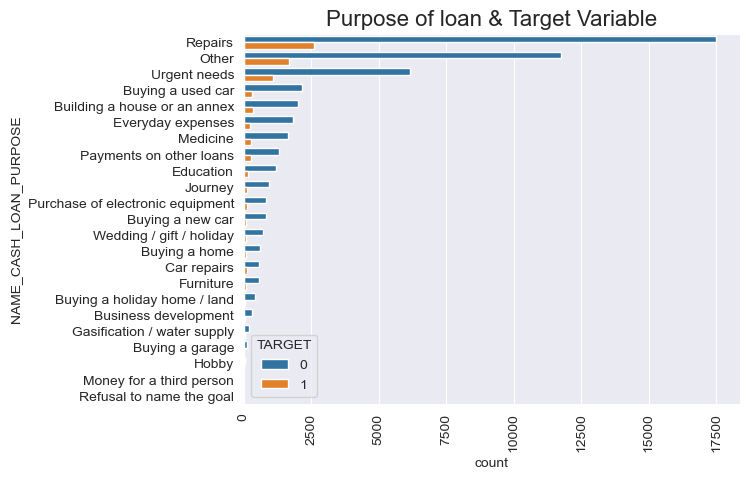

In [274]:
plt.xticks(rotation=90)
plt.title('Purpose of loan & Target Variable')
sns.set_style('darkgrid')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET') 
plt.show()

 Observation from the above fig:
 - Here we can see that the Repairs as a purpose of loan leads to more defaulters, hence we can avoid giving loans in this category.

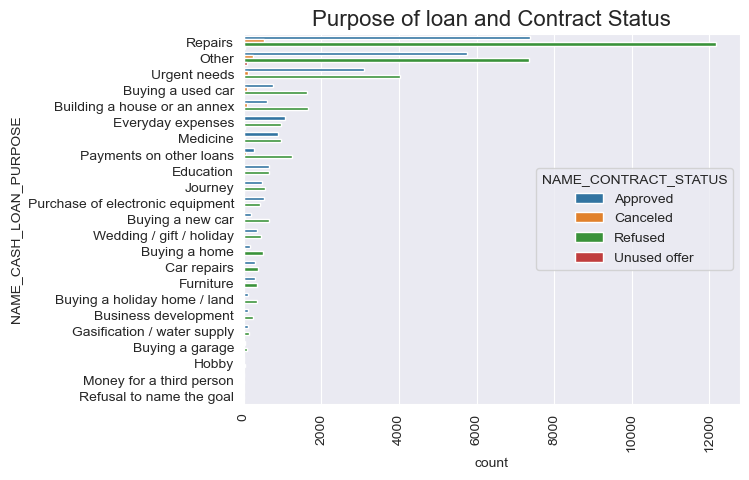

In [275]:
plt.xticks(rotation=90)
plt.title('Purpose of loan and Contract Status')
sns.set_style('darkgrid')
ax = sns.countplot(data = merged_data, y= 'NAME_CASH_LOAN_PURPOSE', order=merged_data['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS') 
plt.show()


 Observation from the above fig:
 - Here we can see that the Approval for the Repairs as a purpose of loan is high and it will lead to defaulters.

### Bivariate analysis with TARGET and other variables

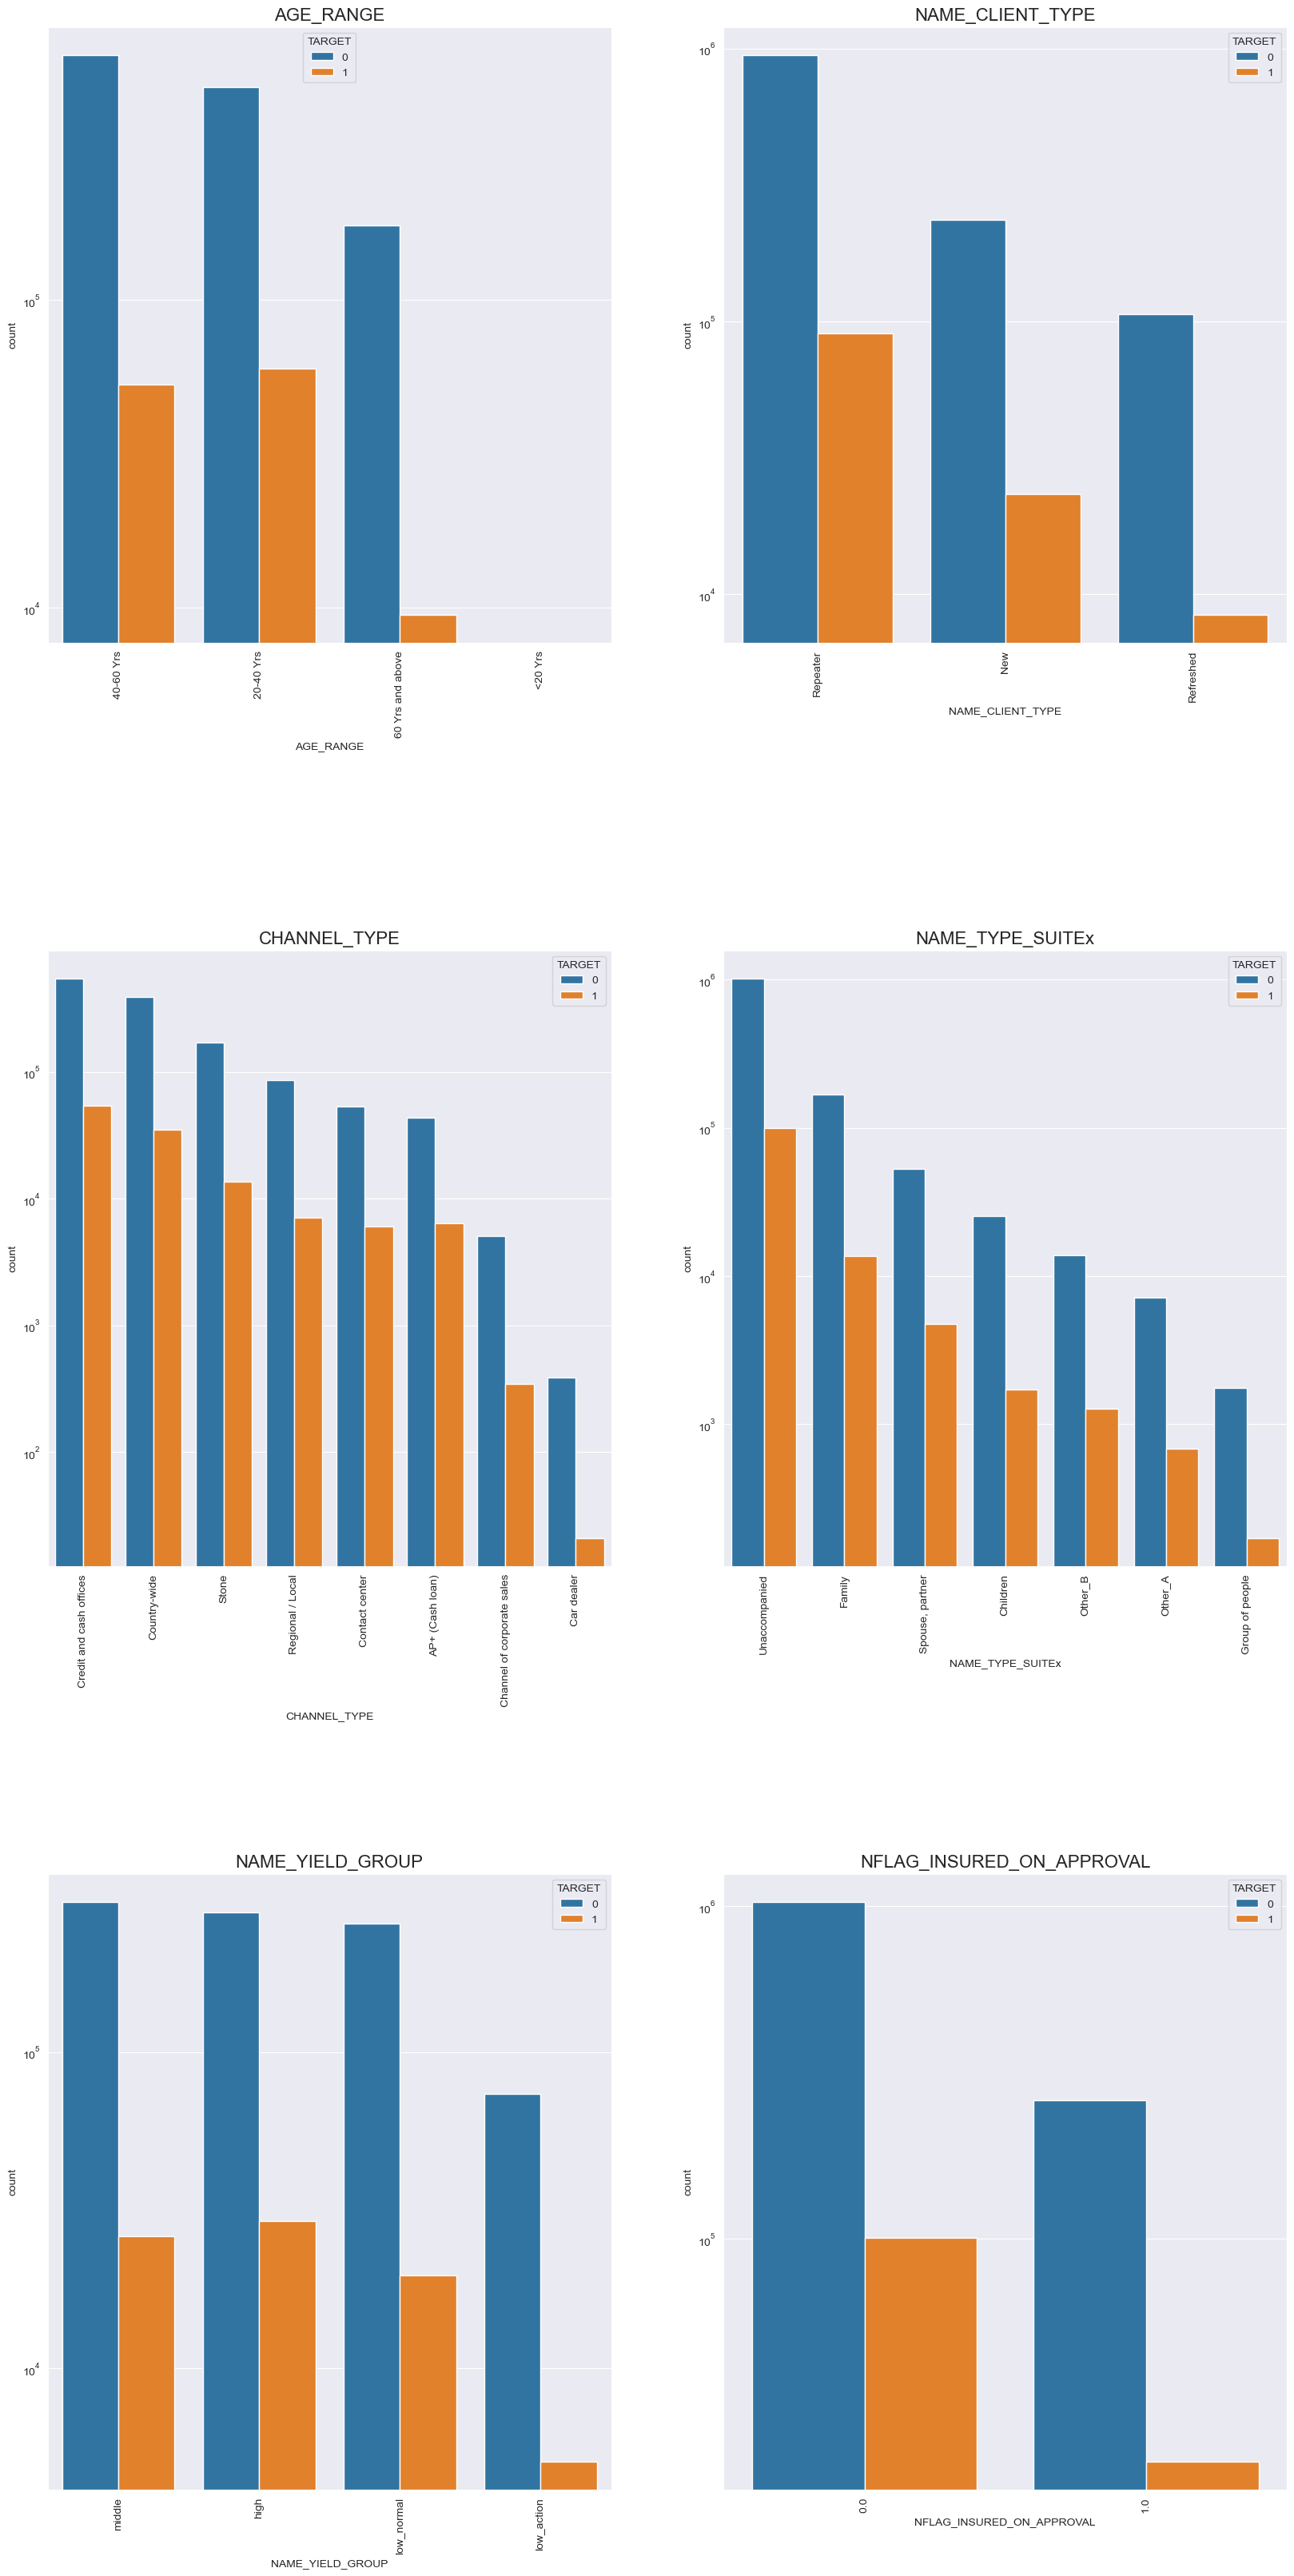

In [295]:
plt.figure(figsize = (20, 40))

for i, col in enumerate(['AGE_RANGE', 'NAME_CLIENT_TYPE', 'CHANNEL_TYPE','NAME_TYPE_SUITEx', 'NAME_YIELD_GROUP', 'NFLAG_INSURED_ON_APPROVAL' ]):
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x= col, hue = 'TARGET', data = merged_data, order=merged_data[col].value_counts().index)
    plt.title(col)
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

Observation from the above figs:

- There are more defaulters than non-defaulters in 20-40 years age range than 40-60 years range, also there is considerably less risk with clients of age 60 years and above.

- Repeaters have more defaulters than New applicants, while Refreshed applicants have the least defaulters.

- We are getting more clients from Credit and cash offices at the same time defaulters are also high. 

- Those applicants who are accompanied with family, spouse, children are less risky.

- High interest rates lead to slightly more defaulters while low_action interest rates are the least risky.

- Insured applicants do not tend to be defaulters more often.








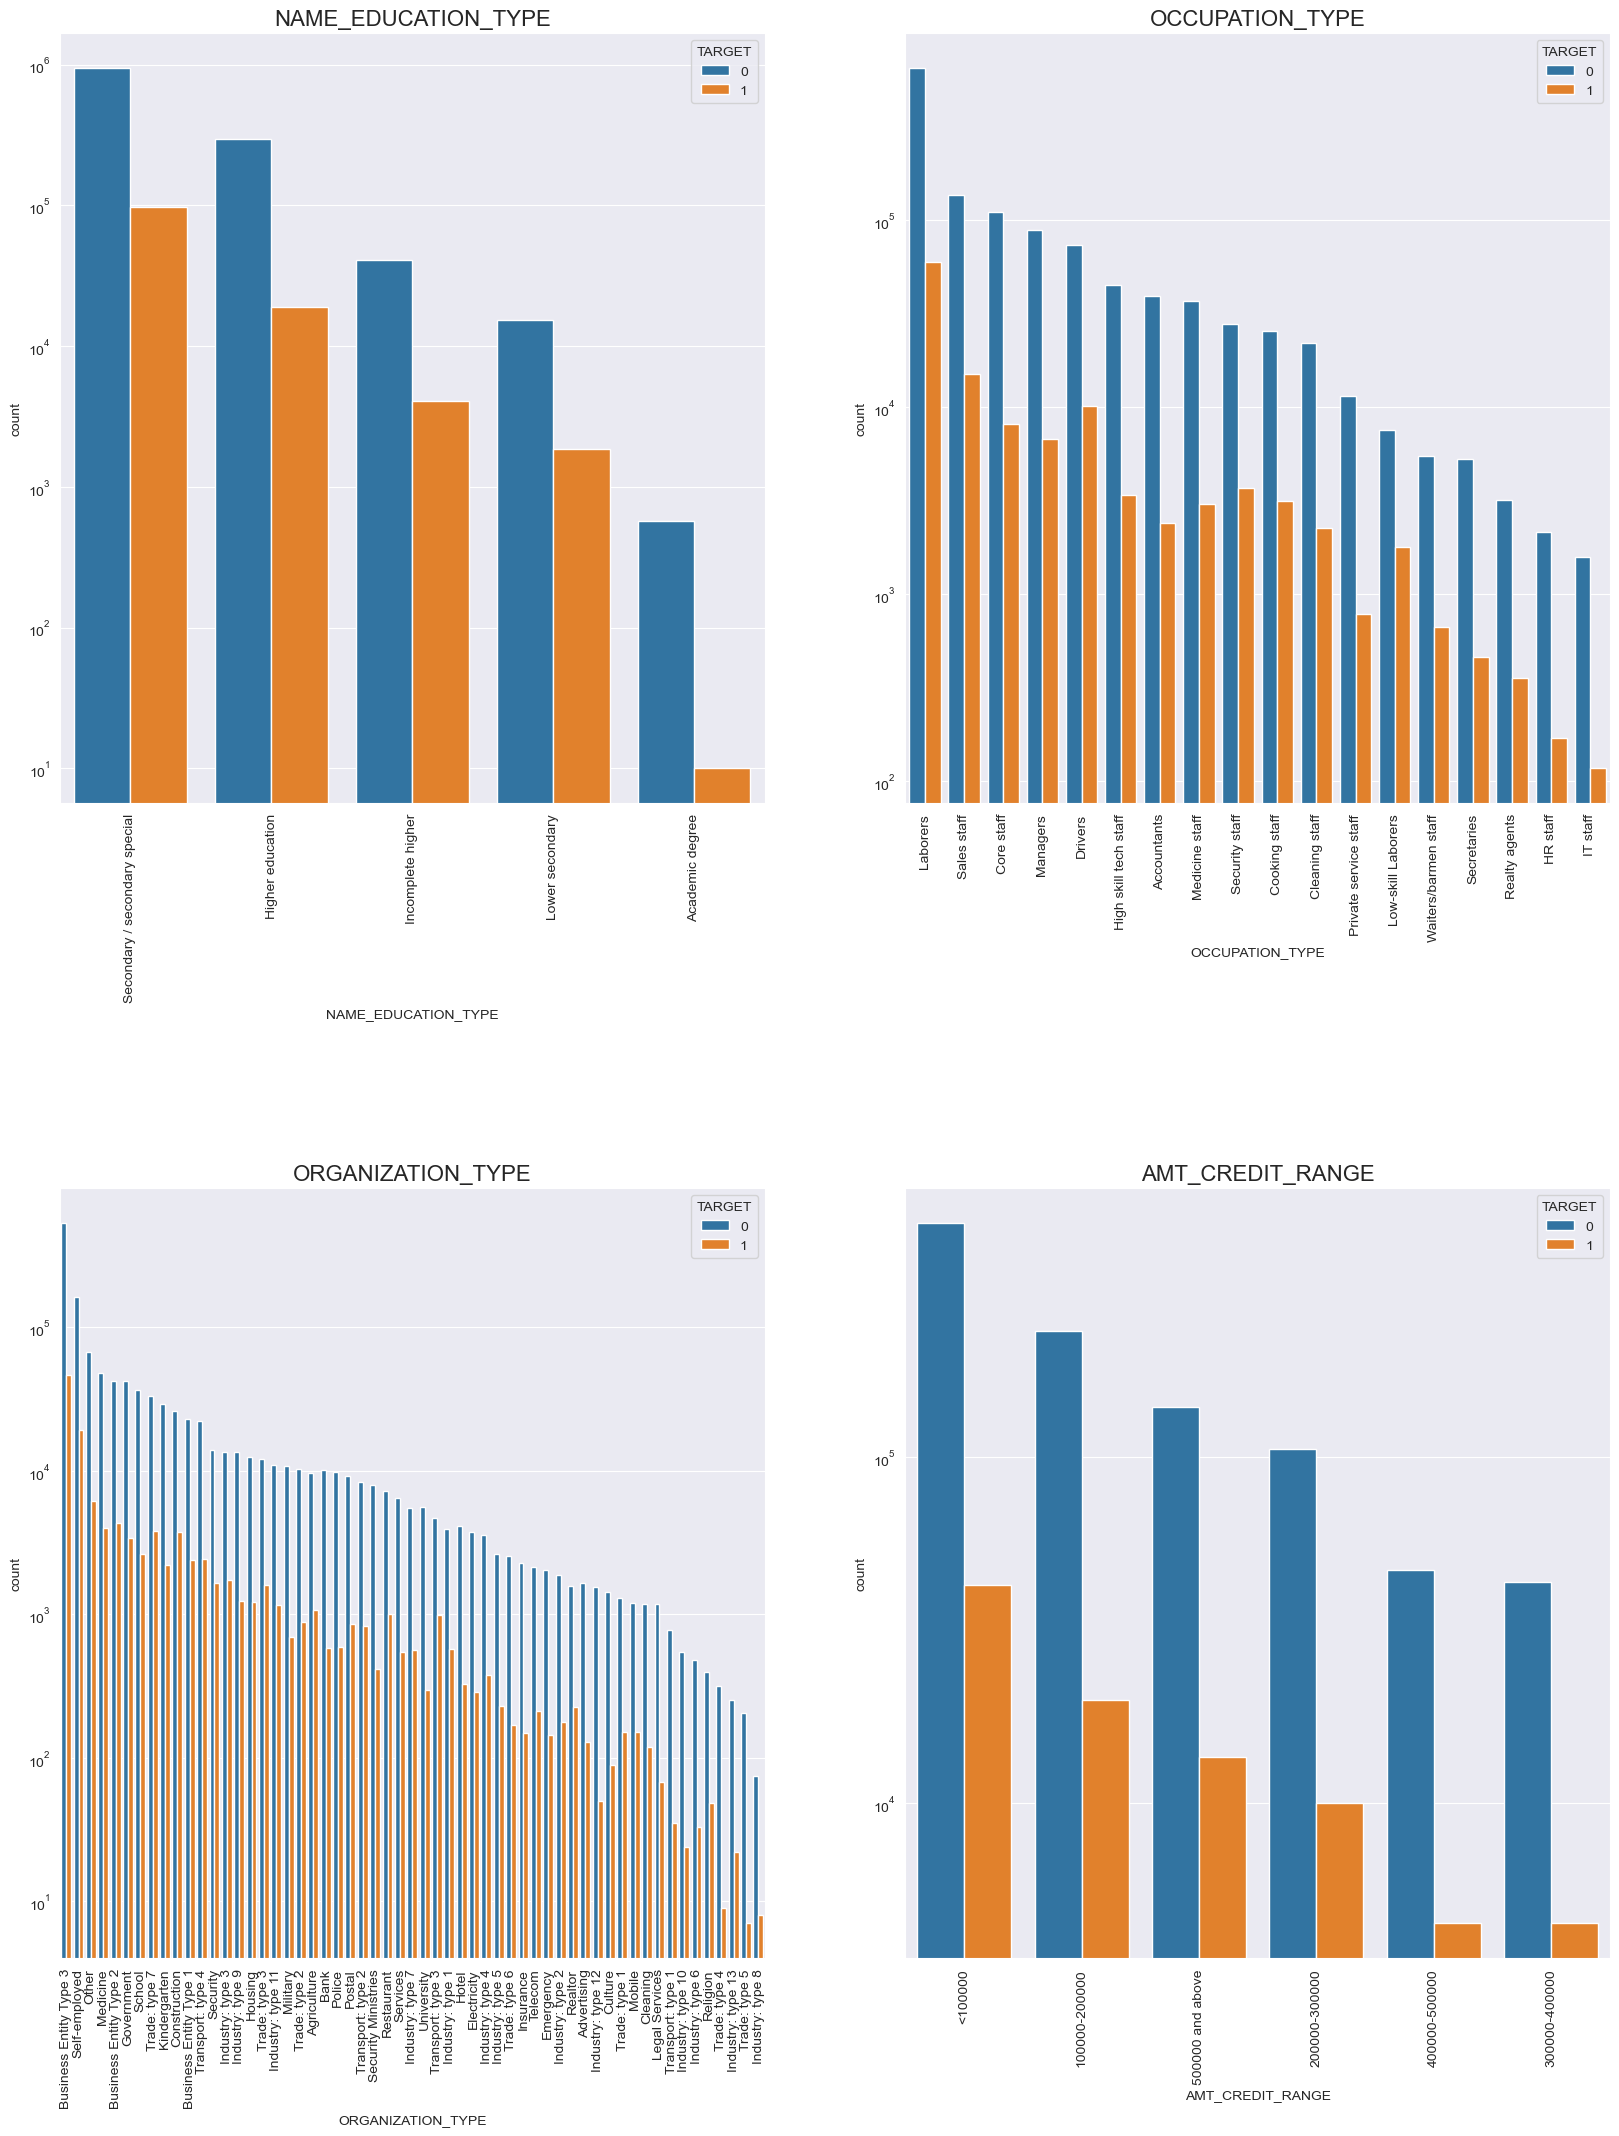

In [296]:
plt.figure(figsize = (20, 40))

for i, col in enumerate(['NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE','AMT_CREDIT_RANGE' ]):
    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(hspace=0.5)
    sns.countplot(x= col, hue = 'TARGET', data = merged_data, order=merged_data[col].value_counts().index)
    plt.title(col)
    plt.rcParams['axes.titlesize'] = 16
    
    plt.xticks(rotation = 90)
    plt.yscale('log')

Observation from the above figs:

- Applicants with Secondary education lead to more deafulters.

- Labourer as the occupation type has more deaulters.

- Business Entity Type 3 and Self employed as organization type lead to more defaulters.

- Credit amounts <100000 leads to more defaulters i.e high credit is less risky.







# Conclusions

- Applicants with income type 'Working' have high no. of defaulters, so banks should be cautious while 'Business' and 'Student' have the least no. of defaulters.

- People having income range 100000-200000 have high number of loans and also have more defaulters than others, while income segment > 500000 has less defaulters.

- 'Females' apply more for loans and tend to be become defaulters slightly more often than males.

- People apply more for 'Cash Loan' than 'Revolving Loan', also defaulters ae higher in 'Cash Loan'

- There are more defaulters than non-defaulters in 20-40 years age range than 40-60 years range, also there is considerably less risk with clients of age 60 years and above.

- Repeaters have more deafulters than New applicants, while Refreshed applicants have the least defaulters.

- High interest rates lead to slightly more deafulters while low_action interest rates are the least risky.

- Insured applicants do not tend to be defaulters more often.

- Laboorers as the occupation type has more deaulters.

- Applicants with Secondary education lead to more deafulters.

- Credit amounts <100000 leads to more deafulters i.e high credit is less risky.

